## In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:

* Write a function to take an an array and a degree and return an data frame where each column is the array to a polynomial value up to the total degree.
* Use a plotting tool (e.g. matplotlib) to visualize polynomial regressions
* Use a plotting tool (e.g. matplotlib) to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

#### Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’

In [3]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x:x**power)
    return poly_dataframe

For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales dataframe by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [7]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [8]:
#Make a 1 degree polynomial Sdf with sales[‘sqft_living’] as the the feature.
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

Use linear regression library to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(poly1_data[['power_1']])
y = np.asanyarray(poly1_data[['price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[280.6235679]]
Intercept:  [-43580.74309447]


 Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib 

Text(0, 0.5, 'Price')

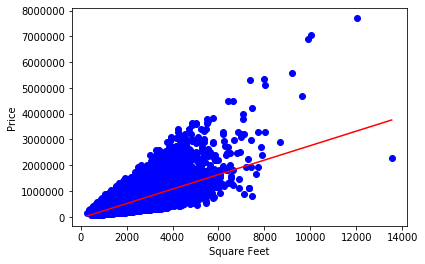

In [10]:
plt.scatter(poly1_data.power_1, poly1_data.price, color = 'blue')
plt.plot(x, regr.predict(x),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

Text(0, 0.5, 'Price')

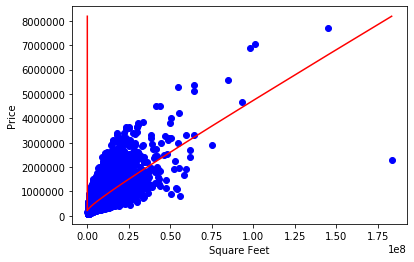

In [69]:
# Using a 2nd degree polynomial 
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = list(poly2_data.columns)
poly2_data['price'] = sales['price']

regr = linear_model.LinearRegression()
x2 = np.asanyarray(poly2_data[my_features])
y2 = np.asanyarray(poly2_data[['price']])
regr.fit (x2, y2)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(poly2_data.power_2, poly2_data.price, color = 'blue')
plt.plot(x2, regr.predict(x2),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

In [68]:
list(poly2_data.columns)

['power_1', 'power_2', 'price']

Text(0, 0.5, 'Price')

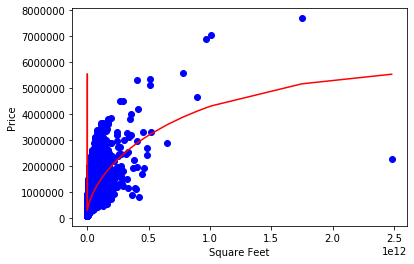

In [70]:
# Using a 3rd degree polynomial 
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
my_features = list(poly3_data.columns)
poly3_data['price'] = sales['price']

regr = linear_model.LinearRegression()
x3 = np.asanyarray(poly3_data[my_features])
y3 = np.asanyarray(poly3_data[['price']])
regr.fit (x3, y3)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(poly3_data.power_3, poly3_data.price, color = 'blue')
plt.plot(x3, regr.predict(x3),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

Coefficients:  [[ 1.45714408e+04 -4.26493726e+01  7.01294192e-02 -7.21230035e-05
   4.94962609e-08 -2.36022724e-11  8.02653218e-15 -1.97727562e-18
   3.55227307e-22 -4.64439865e-26  4.36330419e-30 -2.86482683e-34
   1.24612491e-38 -3.22231405e-43  3.74558500e-48]]
Intercept:  [-1865884.8022032]


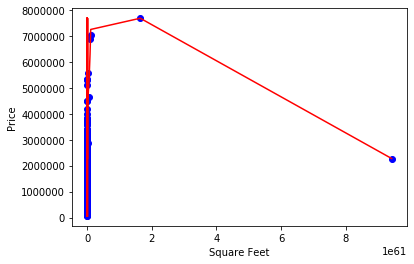

In [71]:
# Using a 15th degree polynomial 
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features = list(poly15_data.columns)
poly15_data['price'] = sales['price']

regr = linear_model.LinearRegression(normalize = True)
x15 = np.asanyarray(poly15_data[my_features])
y15 = np.asanyarray(poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(poly15_data.power_15, poly15_data.price, color = 'blue')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

### Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [15]:
#read the subset csv files
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict).sort_values(['sqft_living','price'])
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict).sort_values(['sqft_living','price'])
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict).sort_values(['sqft_living','price'])
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict).sort_values(['sqft_living','price'])

Coefficients:  [[-8.90987642e+04  2.65484903e+02 -4.47321223e-01  4.81342384e-04
  -3.52689490e-07  1.82763903e-10 -6.85182016e-14  1.88129791e-17
  -3.79677496e-21  5.60419613e-25 -5.95816863e-29  4.42752545e-33
  -2.17562340e-37  6.33297576e-42 -8.24562396e-47]]
Intercept:  [12853241.92051027]


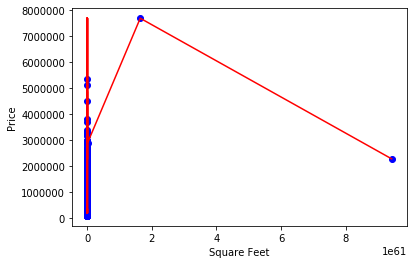

In [72]:
# Using a 15th degree polynomial on set 1
set1_poly15_data = polynomial_dataframe(set_1['sqft_living'], 15)
my_features = list(set1_poly15_data.columns)
set1_poly15_data['price'] = set_1['price']

regr = linear_model.LinearRegression(normalize = True)
x15 = np.asanyarray(set1_poly15_data[my_features])
y15 = np.asanyarray(set1_poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(set1_poly15_data.power_15, set1_poly15_data.price, color = 'blue')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 2.50449530e+04 -8.27277616e+01  1.54617170e-01 -1.84733124e-04
   1.51278079e-07 -8.84546041e-11  3.78106438e-14 -1.19544060e-17
   2.80236419e-21 -4.84100839e-25  6.06410120e-29 -5.34330997e-33
   3.13354193e-37 -1.09614864e-41  1.72823595e-46]]
Intercept:  [-2940786.05858606]


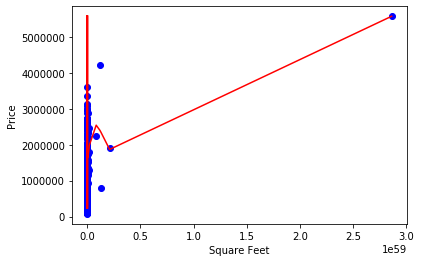

In [73]:
# Using a 15th degree polynomial on set 2
set2_poly15_data = polynomial_dataframe(set_2['sqft_living'], 15)
my_features = list(set2_poly15_data.columns)
set2_poly15_data['price'] = set_2['price']

regr = linear_model.LinearRegression(normalize = True)
x15 = np.asanyarray(set2_poly15_data[my_features])
y15 = np.asanyarray(set2_poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(set2_poly15_data.power_15, set2_poly15_data.price, color = 'blue')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-3.56421861e+04  1.14361080e+02 -2.06705796e-01  2.38357641e-04
  -1.86959535e-07  1.03590568e-10 -4.14736325e-14  1.21466580e-17
  -2.61266906e-21  4.10915582e-25 -4.65799627e-29  3.69695417e-33
  -1.94603970e-37  6.09429164e-42 -8.58461618e-47]]
Intercept:  [4895564.1439016]


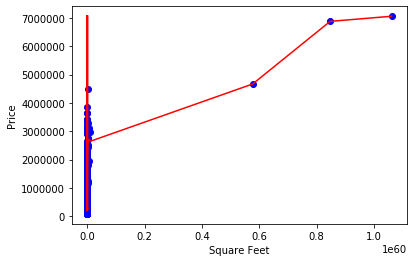

In [74]:
# Using a 15th degree polynomial on set 3
set3_poly15_data = polynomial_dataframe(set_3['sqft_living'], 15)
my_features = list(set3_poly15_data.columns)
set3_poly15_data['price'] = set_3['price']

regr = linear_model.LinearRegression(normalize = True)
x15 = np.asanyarray(set3_poly15_data[my_features])
y15 = np.asanyarray(set3_poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(set3_poly15_data.power_15, set3_poly15_data.price, color = 'blue')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-4.72600695e+04  1.83937461e+02 -3.99591085e-01  5.49984471e-04
  -5.12744838e-07  3.37168859e-10 -1.60373438e-13  5.59839484e-17
  -1.44233622e-20  2.73335509e-24 -3.75759918e-28  3.64050816e-32
  -2.35404126e-36  9.10927443e-41 -1.59406276e-45]]
Intercept:  [5243694.32377657]


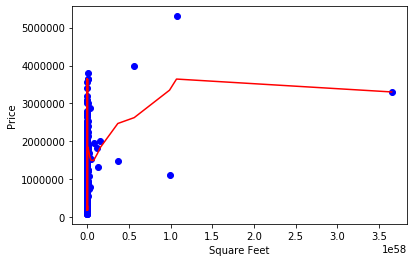

In [75]:
# Using a 15th degree polynomial on set 4
set4_poly15_data = polynomial_dataframe(set_4['sqft_living'], 15)
my_features = list(set4_poly15_data.columns)
set4_poly15_data['price'] = set_4['price']

regr = linear_model.LinearRegression(normalize = True)
x15 = np.asanyarray(set4_poly15_data[my_features])
y15 = np.asanyarray(set4_poly15_data[['price']])
regr.fit (x15, y15)
# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)
plt.scatter(set4_poly15_data.power_15, set4_poly15_data.price, color = 'blue')
plt.plot(x15, regr.predict(x15),'-r')
plt.xlabel("Square Feet")
plt.ylabel("Price")
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

#### Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree

In [27]:
#first split the sales into training_and_validation and testing with 0.9
msk = np.random.rand(len(sales)) < 0.9
training_and_validation = sales[msk]
testing = sales[~msk]

In [28]:
#then split training_and_validation into training and validation with 0.5
nsk = np.random.rand(len(training_and_validation)) < 0.5
training = training_and_validation[nsk]
validation = training_and_validation[~nsk]

In [29]:
print(testing.shape)
print(training.shape)
print(validation.shape)

(2172, 21)
(9836, 21)
(9605, 21)


Now for each degree from 1 to 15:

* Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
* Add training_data[‘price’] as a column to your polynomial data set
* Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
* Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [84]:
for i in range(1,16):
    poly_data = polynomial_dataframe(training['sqft_living'], i)
    my_features = list(poly_data.columns)
    poly_data['price'] = training['price']

    regr = linear_model.LinearRegression(normalize = True)
    x = np.asanyarray(poly_data[my_features])
    y = np.asanyarray(poly_data[['price']])
    regr.fit(x,y)
    
    validation_data =  polynomial_dataframe(validation['sqft_living'], i)
    valid_features = list(validation_data.columns)
    x_v = np.asanyarray(validation_data[valid_features])
    validation_data['price'] = validation['price']
    y_v = np.asanyarray(validation_data[['price']])
 
    y_hat= regr.predict(x_v)

    print("RSS for degree", i,": %.2f" 
          % np.sum((y_hat-y_v)**2))

RSS for degree 1 : 621293558341661.50
RSS for degree 2 : 630417882498285.12
RSS for degree 3 : 636953186721439.50
RSS for degree 4 : 643631298925973.88
RSS for degree 5 : 619214571985931.62
RSS for degree 6 : 635761526844537.38
RSS for degree 7 : 731742038717682.38
RSS for degree 8 : 623047026293402.25
RSS for degree 9 : 3128741605589163.00
RSS for degree 10 : 170201195584954080.00
RSS for degree 11 : 6890388342384324608.00
RSS for degree 12 : 505043099972136075264.00
RSS for degree 13 : 57635317031286849142784.00
RSS for degree 14 : 707862147313009086693376.00
RSS for degree 15 : 2424677012209027472424960.00


### Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

In [85]:
poly_data = polynomial_dataframe(training['sqft_living'], 5)
my_features = list(poly_data.columns)
poly_data['price'] = training['price']

regr = linear_model.LinearRegression(normalize = True)
x = np.asanyarray(poly_data[my_features])
y = np.asanyarray(poly_data[['price']])
regr.fit(x,y)

testing_data =  polynomial_dataframe(testing['sqft_living'], 5)
test_features = list(testing_data.columns)
x_test = np.asanyarray(testing_data[test_features])
testing_data['price'] = testing['price']
y_test = np.asanyarray(testing_data[['price']])

y_hat= regr.predict(x_test)

print("RSS for degree", 5,": %.2f" 
      % np.sum((y_hat-y_test)**2))

RSS for degree 5 : 125368814931247.34
